# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

This problem is important to solve because loans that are defaulted on hurt the profit margins of retail banks, and banking plays an important role in modern economies, as was seen with the 2008 crash. Therefore, banks need to be careful about who they loan money to, and it is important that the decision is made on statistics rather than pure heuristics, as decisions based on heuristics may not always be the most optimal decisions.

### **The objective:**

The objective is to create a classification model that accurately predicts who is likely to default on a loan, and on that basis, the bank can then approve or reject customers for home equity loans.

### **The key questions:**

- What factors are important in deciding whether or not to approve someone for a loan?
- What factors govern approval or rejection for a loan?
- How much customisation of the model can the client do?

### **The problem formulation**:

We are attempting to come up with a way to accurately predict who is likely to default on their loans in order to make a decision on whether or not to approve someone for a home equity loan based on statistics about the person, such as the debt to income ratio of the loan. We're using data science in order to simplify the decision making process of who should be approved for a loan.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Libraries for predictive modelling
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #Library for tuning models 

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve

#Libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
home_eq = pd.read_csv('hmeq.csv')
home_eq_copy = home_eq.copy()
home_eq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
home_eq.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [4]:
home_eq.shape #this shows how many rows and columns are in the dataset

(5960, 13)

In [5]:
home_eq.info() #this says what data type the data in each column is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
home_eq.duplicated().sum() #this checks if any rows have been duplicated

0

The dataset has 5960 rows and 13 columns. All of the columns except for 'BAD' and 'LOAN' have missing values. All columns are of numeric data types except for 'REASON' and 'JOB'. No rows have been duplicated.

## Summary Statistics

In [7]:
home_eq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


- There is a big spread in the amount borrowed for a home equity loan, ranging from to 1,100 to \$89,900 
- Most of the columns are fairly normally distributed
- The oldest credit line held in the dataset is 97 years old; this is an outlier though as the first modern credit card was invented in the 1950's.
- The median oldest credit line held is ~14.5 years old.
- The minimum value of a property is \$8,000; this data point is likely an outlier considering that this is home equity loan data, and assuming this data is from the USA.
- The maximum value in the debt-to-income column is likely an outlier, as it is 203%.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?
9. Is there a relationship between the value of a home and the loan amount taken out?
10. Is there a link between the number of credit lines an individual has and the loan amount they were approved for?
11. Is there a relationship between the REASON variable and the loan amount approved?
12. Is there a relationship between the REASON variable and the value of the property?

### **Univariate Analysis**


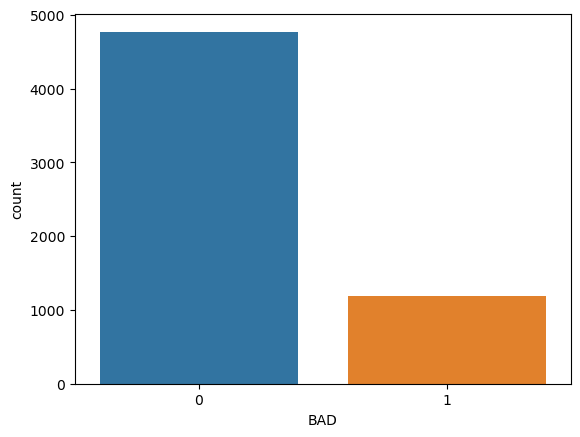

In [8]:
sns.countplot(x='BAD', data=home_eq)
plt.show()

Based on the graph above, ~ 1 in 5 clients default on their home equity loans.

In [9]:
home_eq['BAD'].value_counts(normalize=True)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

In [10]:
home_eq['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [11]:
home_eq['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

There are only two unique values in the 'REASON' column (debt consolidation and home improvement) and the most common reason for a home equity loan is debt consolidation. There are 6 unique values in the jobs column, and the most common job type was 'other' and the least common job type was 'sales'.

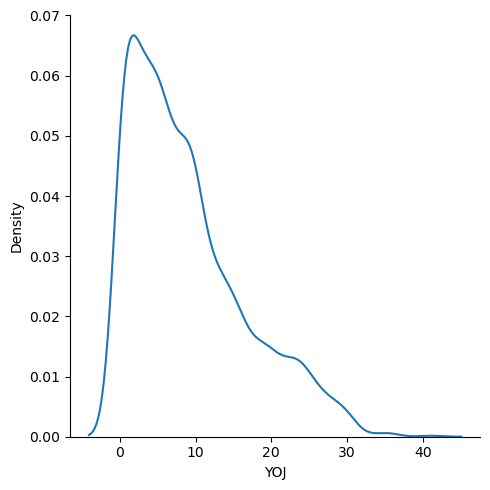

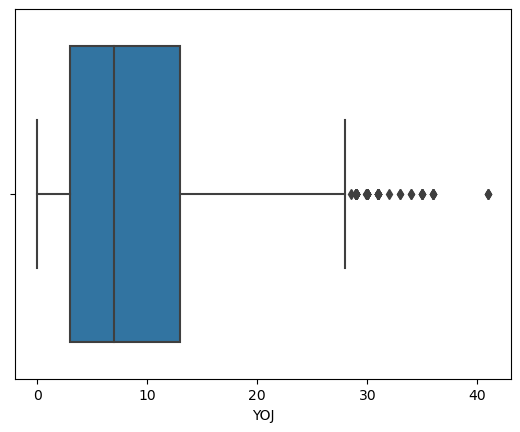

In [12]:
sns.displot(home_eq['YOJ'], kind='kde')
plt.show()

sns.boxplot(home_eq['YOJ'])
plt.show()

Years at present job has quite a wide range, though from the distribution plot, the years at present job is concertrated in the 0-15 year range. There are some outliers in this set, such as people who have had their job for more than ~28 years. This wide range makes sense, because people of various ages apply for home equity loans.

Column name: LOAN
Skew: 2.023780711662712


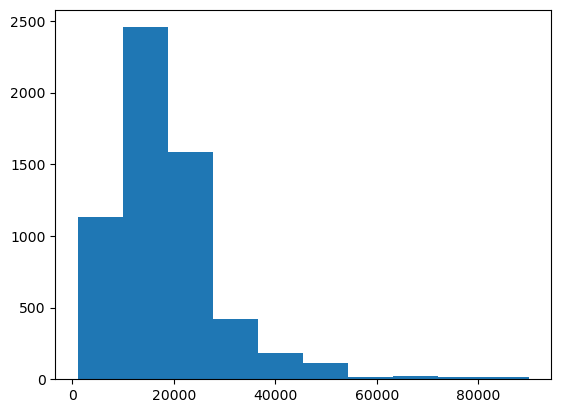

Column name: MORTDUE
Skew: 1.8144807024145053


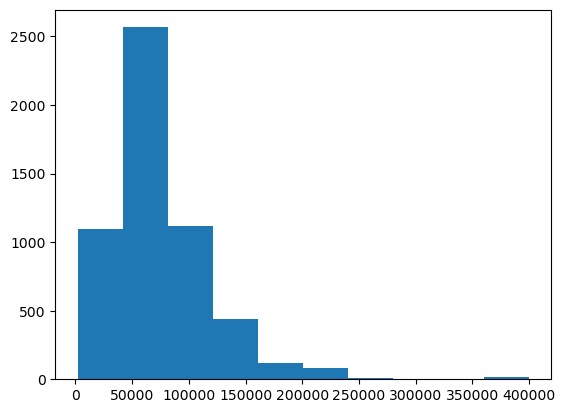

Column name: VALUE
Skew: 3.053344266520436


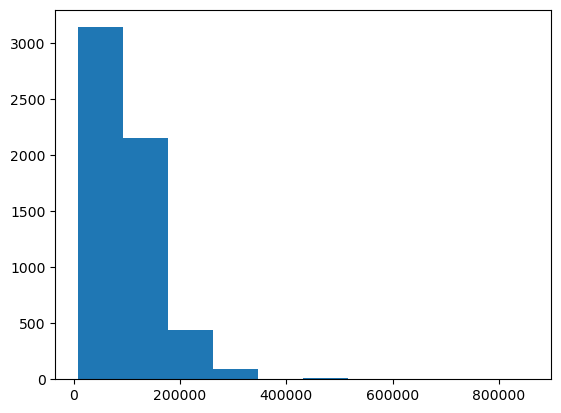

Column name: DEROG
Skew: 5.320870250335324


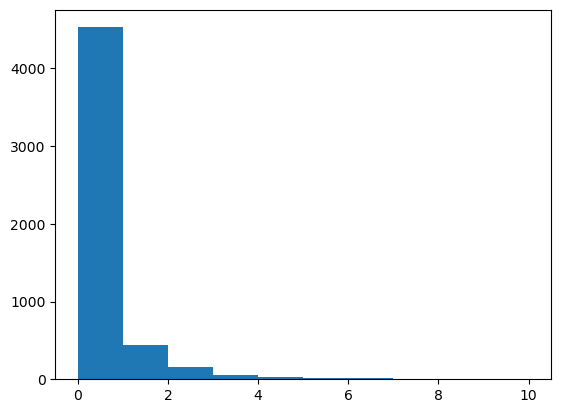

Column name: DELINQ
Skew: 4.023149577223611


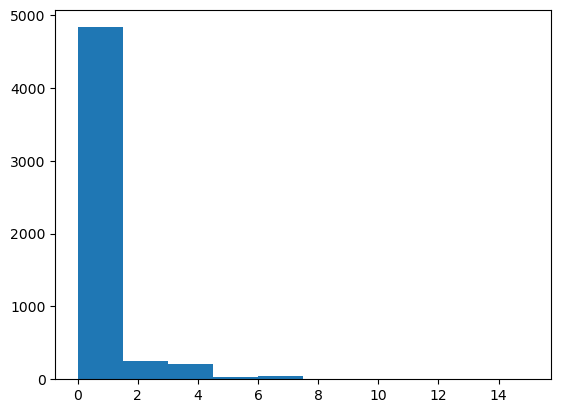

Column name: CLAGE
Skew: 1.3434120433858243


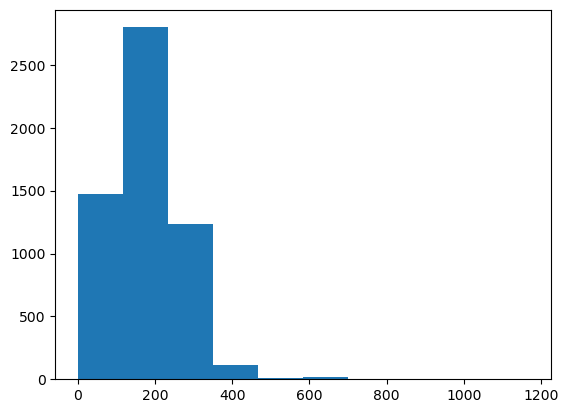

Column name: NINQ
Skew: 2.6219841722623216


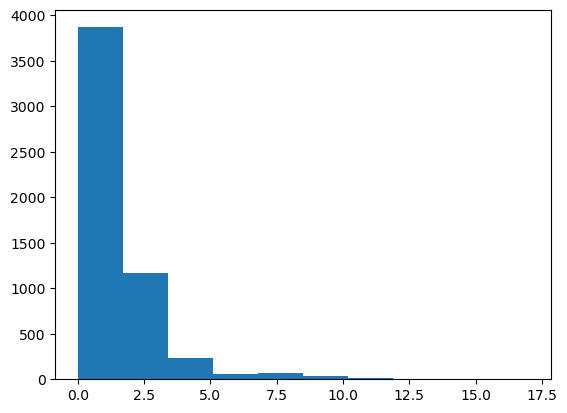

Column name: CLNO
Skew: 0.7750517582950025


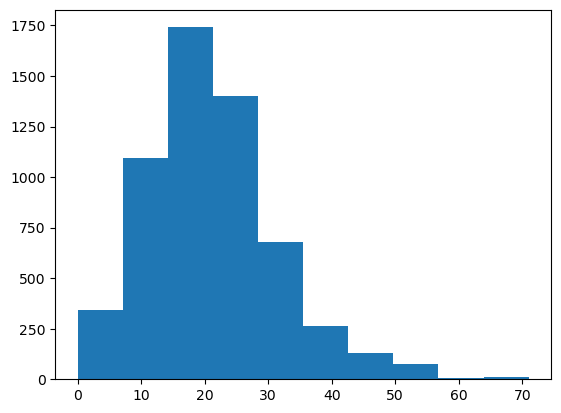

Column name: DEBTINC
Skew: 2.8523534162154887


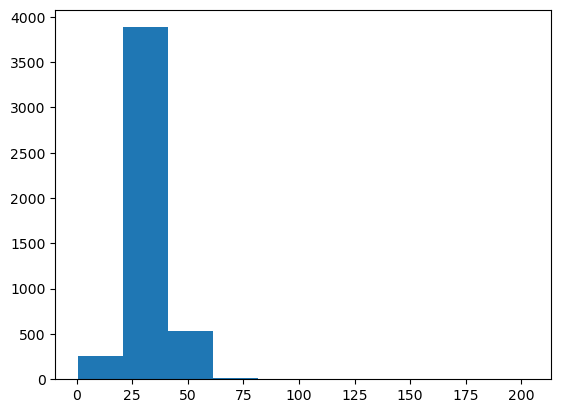

In [13]:
num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for col in num_cols:
    print('Column name:', col)
    skew = home_eq[col].skew()
    print('Skew:', skew)
    plt.hist(home_eq[col])
    
    plt.show()

The data in these columns is very right skewed, though the `CLNO` column is significantly less right skewed compared to the other columns. The data in the `CLNO` column is close to being normally distributed. The debt-to-income ratio is predominately between 0% and 40%, and the debt-to-income ratio tapers off drastically after 50%. The rate of deliquency mainly being between 0 and 2 makes sense, as after more than 2 deliquent credit lines, it's unlikely that a person would be able to get credit or afford to buy a property. 

The values of the properties taper off after \$200,000, which suggests that this data is likely based in a lower cost of living area, and that the people who tend to apply for home equity loans may not be especially rich.

Column name: LOAN


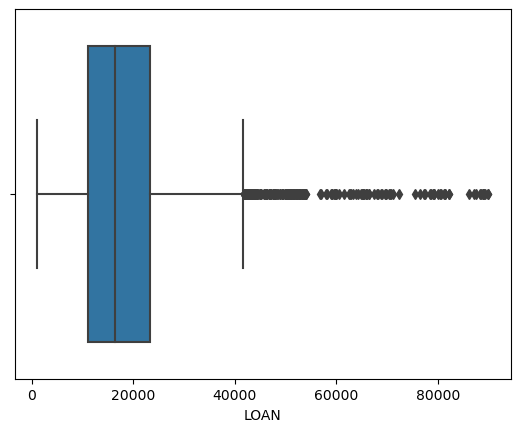

Column name: MORTDUE


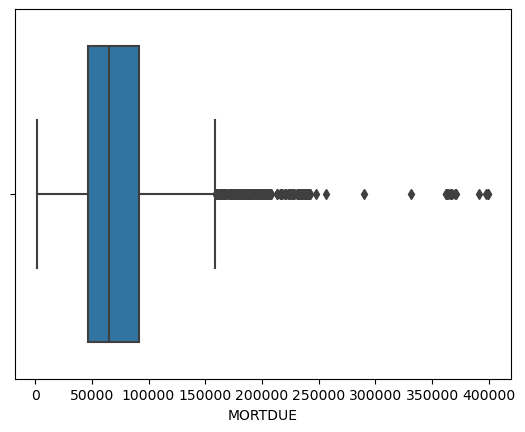

Column name: VALUE


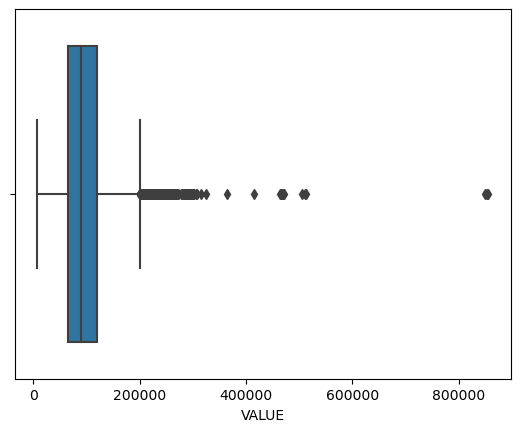

Column name: DEROG


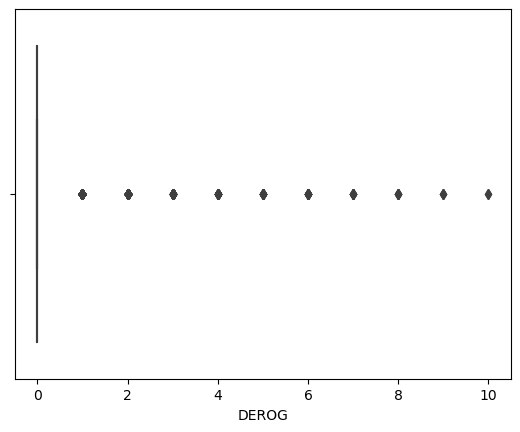

Column name: DELINQ


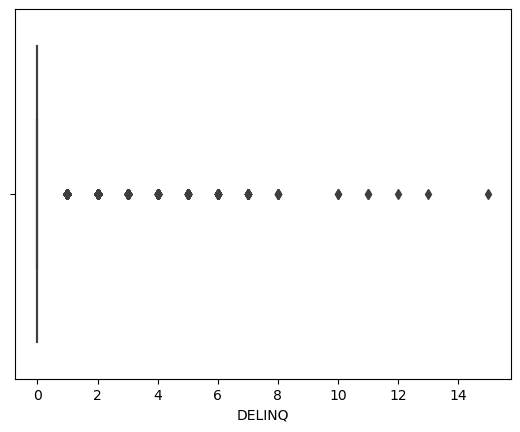

Column name: CLAGE


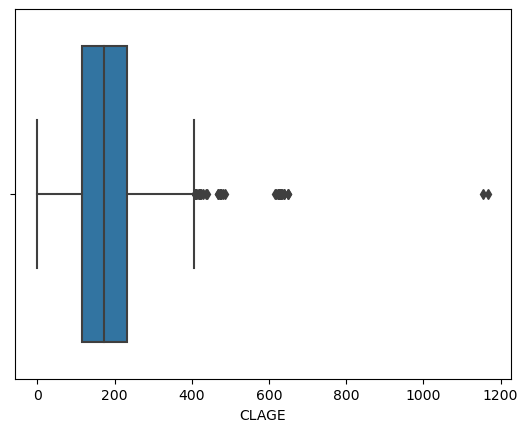

Column name: NINQ


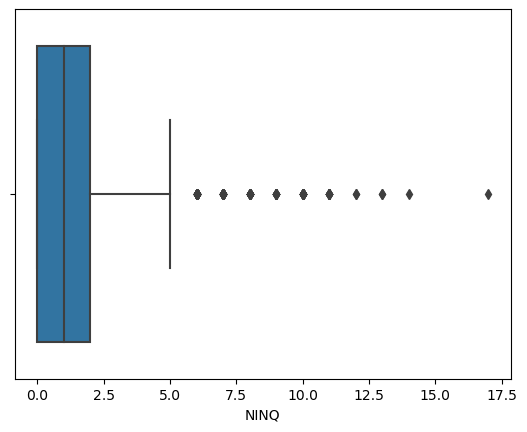

Column name: CLNO


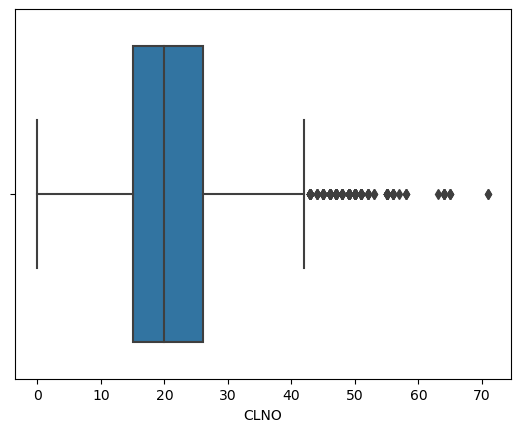

Column name: DEBTINC


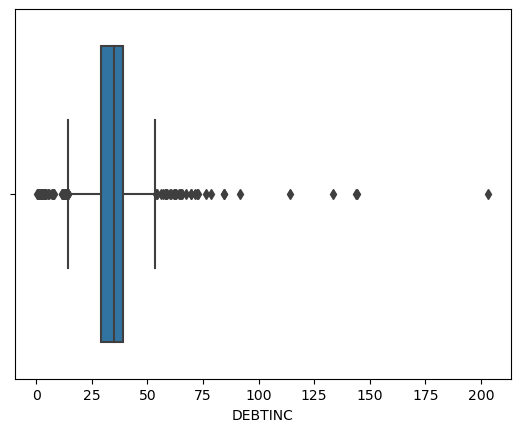

In [14]:
for col in num_cols:
    print('Column name:', col)
    sns.boxplot(home_eq[col])
    
    plt.show()

There are a lot of outliers in the numerical columns. The range of values for loans (not including outliers) is between 0 and \$40,000.

### **Bivariate Analysis**

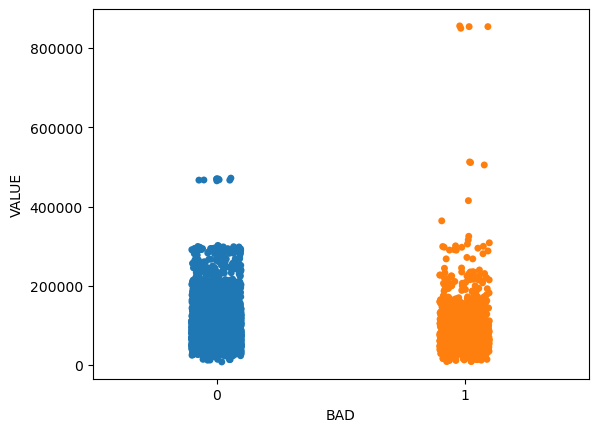

In [15]:
sns.stripplot(data= home_eq, x='BAD', y='VALUE')
plt.show()

There appears to be very little correlation between the value of the property and the likelihood of defaulting on the loan; both groups seem to overall have very similarly valued properties. It is interesting to note that for the 4 highest property values in this dataset, the loans were all defaulted on.

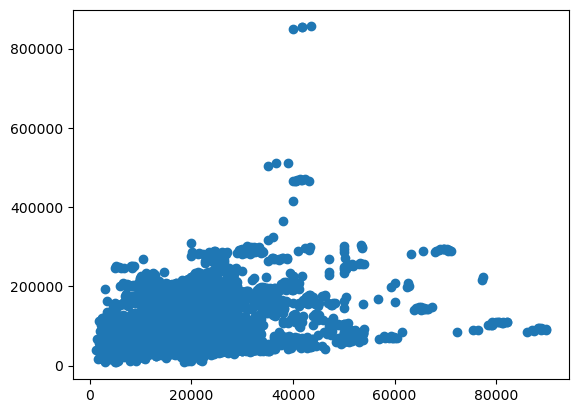

In [16]:
plt.scatter(home_eq['LOAN'], home_eq['VALUE'])
plt.show()

There is a weak positive correlation between the loan amount approved and the value of the property. On first glance, this may seem unusual as the higher the value of the home, the higher the loan amount approved; however, this weak correlation makes sense, since it's likely that someone who has a more expensive home also earns more, and therefore may not need to take out the maximum loan amount that they could theoretically afford based on the value of their property.

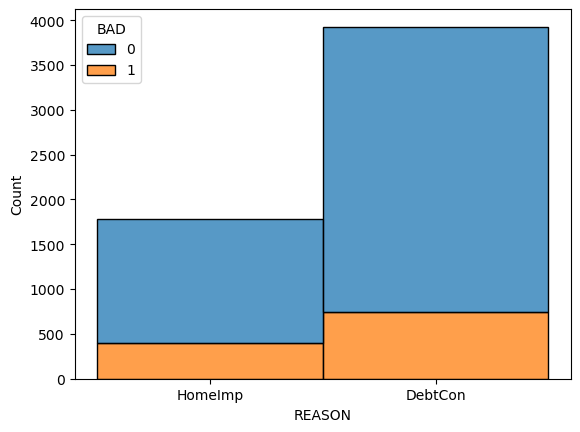

In [17]:
#Plotting a stacked bar chart
sns.histplot(home_eq, x='REASON', hue='BAD', multiple='stack') 
plt.show()

Most of the home equity loans in this dataset are taken out for debt consolidation rather than home improvements, and it seems that a higher proportion of people who take out a home equity loan for debt consolidation default on their loans. However, the latter part is hard to say based on looking at the graph alone.

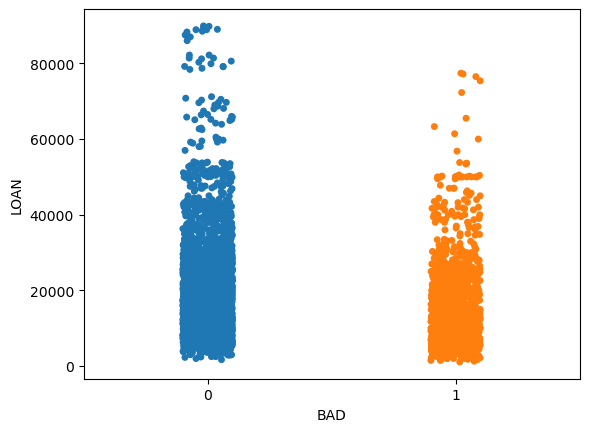

In [18]:
sns.stripplot(data= home_eq, x='BAD', y='LOAN')
plt.show()

Overall, people who default on their loans tend to have a lower loan value compared to people who have fully repaid their loans; this is possibly due to the people defaulting on their loans potentially already having a lower credit score and so being approved for a lower loan amount compared to those who fully repay their loans.

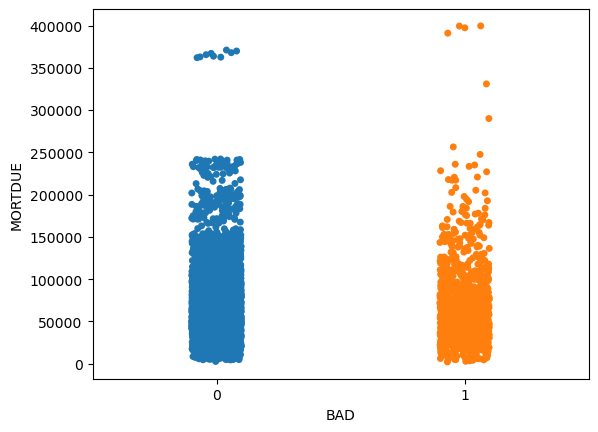

In [19]:
sns.stripplot(data= home_eq, x='BAD', y='MORTDUE')
plt.show()

There isn't a correlation between the amount remaining on the mortgage and whether or not someone defaults on their loan.

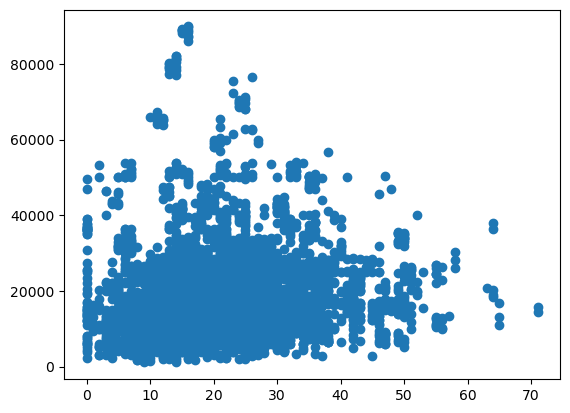

In [20]:
plt.scatter(home_eq['CLNO'], home_eq['LOAN'])
plt.show()

There is no correlation between number of credit lines and loan amount approved.

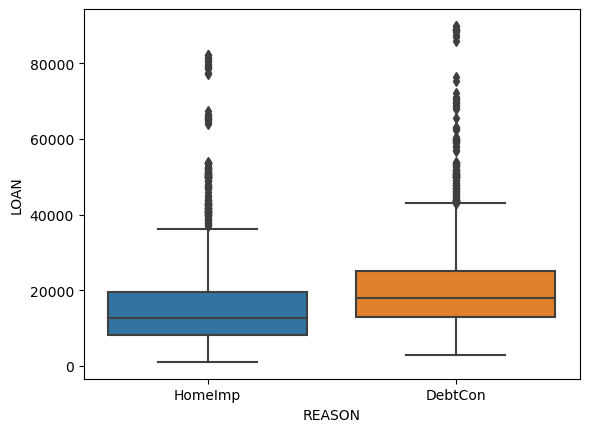

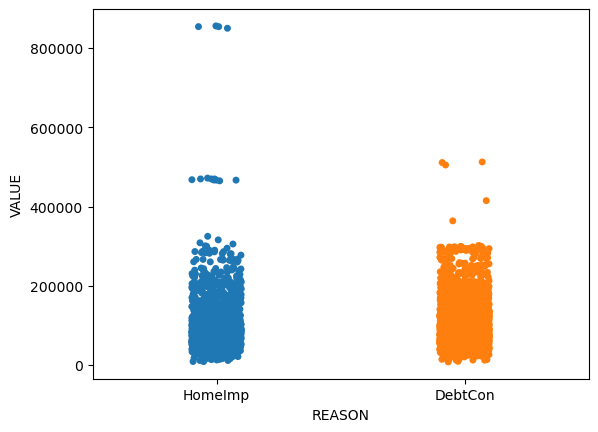

In [21]:
#Plot for relationship between reason for loan and amount of loan approved
plt.figure()
sns.boxplot(data=home_eq, x='REASON', y='LOAN')
#Plot for relationship between reason for loan and value of property
plt.figure()
sns.stripplot(data=home_eq, x='REASON', y='VALUE')

plt.show()

There is almost no correlation between the reason for someone deciding to get a home equity loan and the value of their property, though it is interesting to note that for the 4 highest valued properties, the reason for getting a home equity loan was home improvement.

### **Multivariate Analysis**

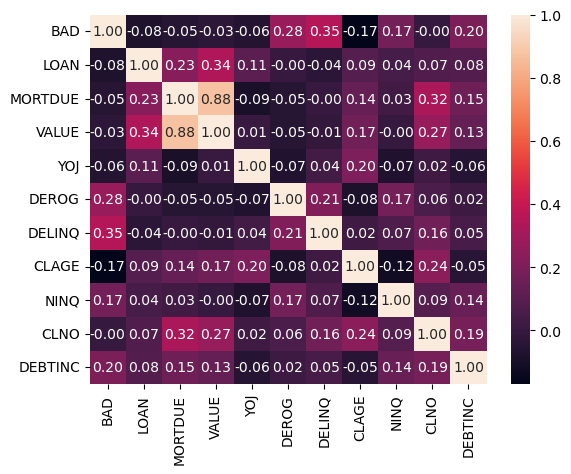

In [22]:
sns.heatmap(home_eq.corr(), annot = True, fmt = '.2f')
plt.show()

**Observations**

Most of the variables have little to no correlation with each other. The five pairs of variables that have the strongest correlations are:`VALUE` and `MORTDUE`, `BAD` and `DELINQ`, `LOAN` and `VALUE`, `CLNO` and `MORTDUE`, and `DEROG` and `BAD`. These pairs of variables having the strongest correlations with each other makes sense; if someone has delinquencies or major derogatory reports, especially multiple, then that shows that they have struggled on paying back debt previously, meaning that they are likely to struggle to do so again, and therefore default on their loans. The higher the value of the property, the higher the loan amount it's possible to get, as the higher the value of the property, the more equity the property has, and home equity loans are based on the equity in your property. 

There is also a negative correlation between defaulting on a home equity loan and the age of a person's oldest credit line. There is a correlation between defaulting on a home equity laon and a person's debt-to-income ratio. 

## Treating Outliers

In [23]:
#Outliers in terms of age of credit line#

credit_length_outliers = home_eq['CLAGE'] > 876 #creates a list of whether or not the length of the oldest credit line exceeds 876 months or 73 years
credit_length_outliers.value_counts() #determines how many True values there are

outliers_cred = home_eq[home_eq['CLAGE'] > 876]
outliers_cred.head()

home_eq.drop(axis=0, index=outliers_cred.index,inplace=True) #dropping the rows which have outliers in terms of credit length
#dropping the rows from the original dataframe; I have made a copy

In [24]:
home_eq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5958.000000,5440.000000,5846.000000,5443.000000,5250.000000,5378.000000,5650.000000,5448.000000,5736.000000,4692.000000
mean,0.199228,18608.157100,73754.156838,101757.274040,8.924444,0.254667,0.449610,179.418782,1.186490,21.303522,33.778546
std,0.399453,11209.333592,44464.338396,57386.607478,7.574523,0.846193,1.127442,83.813239,1.728843,10.132897,8.602151
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46267.500000,66062.500000,3.000000,0.000000,0.000000,115.089691,0.000000,15.000000,29.138448
50%,0.000000,16300.000000,65014.500000,89223.500000,7.000000,0.000000,0.000000,173.404166,1.000000,20.000000,34.817611
75%,0.000000,23300.000000,91482.000000,119780.000000,13.000000,0.000000,0.000000,231.397270,2.000000,26.000000,39.002981
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,649.747104,17.000000,71.000000,203.312149


For determining outliers in value, I am assuming that this dataset is from the USA. Therefore, any properties with a value under 10,000 dollars, as that is the lowest priced property in the USA as of time of writing, that will be considered outliers.

In [25]:
home_value_outliers = home_eq[home_eq['VALUE']<= 10000]
print(len(home_value_outliers))

home_eq.drop(axis=0, index=home_value_outliers.index, inplace=True)

4


In [26]:
home_eq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5954.000000,5954.000000,5439.000000,5842.000000,5439.000000,5247.000000,5375.000000,5646.000000,5444.000000,5732.000000,4692.000000
mean,0.198858,18615.317434,73757.182056,101820.887374,8.929169,0.254812,0.449488,179.496019,1.186627,21.313154,33.778546
std,0.399174,11208.537181,44467.866603,57354.708227,7.575097,0.846413,1.127690,83.792211,1.729364,10.128651,8.602151
min,0.000000,1100.000000,2063.000000,11550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46267.000000,66101.750000,3.000000,0.000000,0.000000,115.197715,0.000000,15.000000,29.138448
50%,0.000000,16300.000000,65017.000000,89245.000000,7.000000,0.000000,0.000000,173.480399,1.000000,20.000000,34.817611
75%,0.000000,23300.000000,91485.000000,119807.750000,13.000000,0.000000,0.000000,231.520871,2.000000,26.000000,39.002981
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,649.747104,17.000000,71.000000,203.312149


## Treating Missing Values

In [27]:
percent_missing = (home_eq.isnull().sum()/len(home_eq))*100 #calculates the percentage of missing values by column

print(percent_missing)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.649647
VALUE       1.881088
REASON      4.232449
JOB         4.685925
YOJ         8.649647
DEROG      11.874370
DELINQ      9.724555
CLAGE       5.172993
NINQ        8.565670
CLNO        3.728586
DEBTINC    21.195835
dtype: float64


In [28]:
#Replacing the missing values in the JOB and REASON columns with the most common value in those columns

home_eq['REASON'].fillna(home_eq['REASON'].mode()[0], inplace=True)
home_eq['JOB'].fillna(home_eq['JOB'].mode()[0], inplace=True)
home_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5954 non-null   int64  
 1   LOAN     5954 non-null   int64  
 2   MORTDUE  5439 non-null   float64
 3   VALUE    5842 non-null   float64
 4   REASON   5954 non-null   object 
 5   JOB      5954 non-null   object 
 6   YOJ      5439 non-null   float64
 7   DEROG    5247 non-null   float64
 8   DELINQ   5375 non-null   float64
 9   CLAGE    5646 non-null   float64
 10  NINQ     5444 non-null   float64
 11  CLNO     5732 non-null   float64
 12  DEBTINC  4692 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 651.2+ KB


For the other columns with missing values, I'll replace the missing values with the median value in that column, as the median isn't vulnerable to outliers, unlike the mean.

In [29]:
percent_missing = (home_eq.isnull().sum()/len(home_eq))*100 #calculates the percentage of missing values by column

print(percent_missing)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.649647
VALUE       1.881088
REASON      0.000000
JOB         0.000000
YOJ         8.649647
DEROG      11.874370
DELINQ      9.724555
CLAGE       5.172993
NINQ        8.565670
CLNO        3.728586
DEBTINC    21.195835
dtype: float64


In [30]:
cols = ['MORTDUE', 'VALUE', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC','YOJ']

for c in cols:
    home_eq[c].fillna(home_eq[c].median(), inplace=True)

In [31]:
home_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5954 non-null   int64  
 1   LOAN     5954 non-null   int64  
 2   MORTDUE  5954 non-null   float64
 3   VALUE    5954 non-null   float64
 4   REASON   5954 non-null   object 
 5   JOB      5954 non-null   object 
 6   YOJ      5954 non-null   float64
 7   DEROG    5954 non-null   float64
 8   DELINQ   5954 non-null   float64
 9   CLAGE    5954 non-null   float64
 10  NINQ     5954 non-null   float64
 11  CLNO     5954 non-null   float64
 12  DEBTINC  5954 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 651.2+ KB


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

- The more common reason for taking out a home equity loan is debt consolidation.
- There is a wide spread of values for the columns with numerical values.
- ~20% of customers who take out home equity loans default on them.
- The debt-to-income ratio is mainly between 0-40%.
- The variable that most strongly correlates with the likelihood of defaulting on a loan is the number of deliquent credit lines a person has.
- There is a correlation between the number of major derogatory reports and defaulting on a home equity loan. 
- Most of the variables have little to no correlation with each other.
- There is a negative correlation between the age of a person's oldest credit line and defaulting on a home equity loan. 

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Choice of models

We chose to test three different models: logistic regression, decision trees, and random forest. We chose these models because in order to solve the problem of who should be approved for a loan, we need to correctly classify who is and isn't going to default on their home equity loan. In summary, we are predicting a variable that is categorical, not continuous.

### Data preparation

In [32]:
home_eq_x = home_eq.drop(columns='BAD') #dropping the variable we want to test the model for
home_eq_y = home_eq['BAD']

In [33]:
home_eq_x = pd.get_dummies(home_eq_x, drop_first=True)

home_eq_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.817611,1,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.817611,1,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.817611,1,0,1,0,0,0
3,1500,65017.0,89245.0,7.0,0.0,0.0,173.480399,1.0,20.0,34.817611,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.817611,1,1,0,0,0,0


In [34]:
#For logistic regression model
#Will use min-max scaler as StandardScaler can affect the encoding of categorical variables

scaler = MinMaxScaler()

home_eq_x_scaled = scaler.fit_transform(home_eq_x)
home_eq_x_scaled = pd.DataFrame(home_eq_x_scaled, columns=home_eq_x.columns)
home_eq_x_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0.000000,0.059869,0.032539,0.256098,0.0,0.000000,0.145236,0.058824,0.126761,0.169108,1.0,0.0,1.0,0.0,0.0,0.0
1,0.002252,0.171050,0.067329,0.170732,0.0,0.133333,0.187509,0.000000,0.197183,0.169108,1.0,0.0,1.0,0.0,0.0,0.0
2,0.004505,0.028773,0.006099,0.097561,0.0,0.000000,0.230038,0.058824,0.140845,0.169108,1.0,0.0,1.0,0.0,0.0,0.0
3,0.004505,0.158380,0.092017,0.170732,0.0,0.000000,0.266997,0.058824,0.281690,0.169108,0.0,0.0,1.0,0.0,0.0,0.0
4,0.006757,0.240856,0.118966,0.073171,0.0,0.000000,0.143646,0.000000,0.197183,0.169108,1.0,1.0,0.0,0.0,0.0,0.0


In [35]:
#Splittig the data into test and train for decision tree and random forest models

DT_x_train, DT_x_test, DT_y_train, DT_y_test = train_test_split(home_eq_x, home_eq_y, test_size = 0.20, random_state=1, stratify= home_eq_y)

#Splitting the data into test and train datasets for logistic regression

LR_x_train, LR_x_test, LR_y_train, LR_y_test = train_test_split(home_eq_x_scaled, home_eq_y, test_size = 0.20, random_state=1, stratify = home_eq_y)

In [36]:
DT_x_train.shape

(4763, 16)

In [37]:
type(DT_x_test)

pandas.core.frame.DataFrame

In [38]:
DT_x_test.shape

(1191, 16)

In [39]:
#Defining a function that displays the confusion matrix and model metrics

def model_metrics(actual, predicted):
    
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    
    CM_visual = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Not Default', 'Default'])
    
    CM_visual.plot() #this visualises the confusion matrix
    #plt.savefig(fname=input(), dpi=300, bbox_inches='tight', pad_inches=0.2) #this enables the visualisation of the confusion matrix to be saved as a png with a name of the user's choice
    plt.show()
    
    print(classification_report(actual, predicted)) #this prints the precision, accuracy, recall, and F1 score of the model

## Comparing the models

After running a variety of models, I have concluded that a tuned decision tree model is my proposed final solution model, as it is the best performing model in terms of recall, and it has the advantage of being interpretable, which is important because the bank needs to be able to give reasoning for rejecting a loan if asked. The tuned decision tree model has the best recall without overfitting the model, and the tuned logistic regression model has the highest precision. These comparisons are on the test data and the metrics concerning defaulting on a home equity loan.

The code and performance of the other models will be placed in the appendix.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


## The final solution

In [40]:
#Tuning the decision tree model

d_tree_model_tune = DecisionTreeClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8}) #these class weights are approximately the opposite to the imbalance in the original data

params = {'max_depth': np.arange(3, 9), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 15]}

score = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_object = GridSearchCV(d_tree_model_tune, params, scoring = score, cv = 5)

grid_object = grid_object.fit(DT_x_train, DT_y_train)

# Setting the classifier to the best combination of parameters
d_tree_model_tune = grid_object.best_estimator_

d_tree_model_tune.fit(DT_x_train, DT_y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=15, random_state=1)

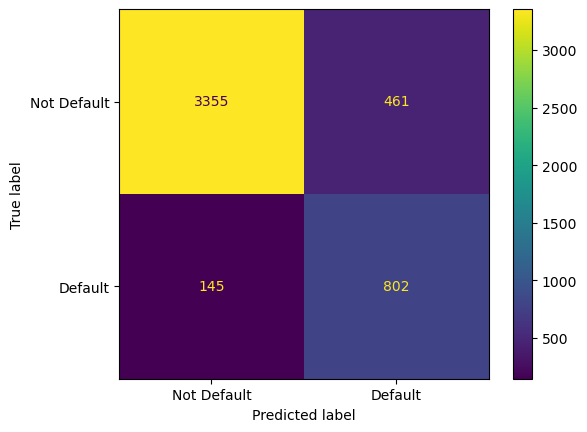

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3816
           1       0.63      0.85      0.73       947

    accuracy                           0.87      4763
   macro avg       0.80      0.86      0.82      4763
weighted avg       0.89      0.87      0.88      4763



In [42]:
DT_predict_train2 = d_tree_model_tune.predict(DT_x_train)

model_metrics(DT_y_train, DT_predict_train2)

Tuned_DT_test_data


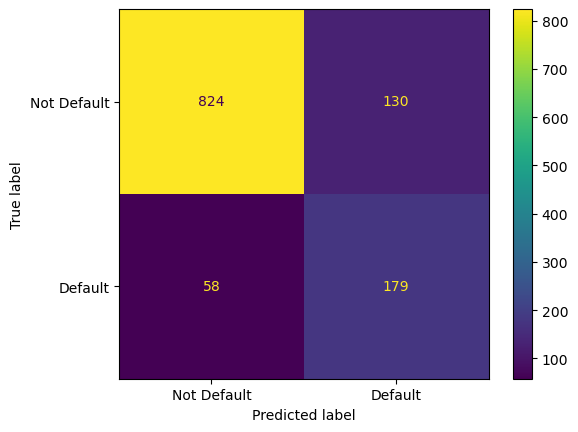

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       954
           1       0.58      0.76      0.66       237

    accuracy                           0.84      1191
   macro avg       0.76      0.81      0.78      1191
weighted avg       0.86      0.84      0.85      1191



In [43]:
DT_predict_test2 = d_tree_model_tune.predict(DT_x_test)

model_metrics(DT_y_test, DT_predict_test2)

In [44]:
#Feature importance of features in tuned decision tree model

DT_feat_importance = pd.DataFrame(d_tree_model_tune.feature_importances_, columns= ['Importance'], index=DT_x_train.columns)

print(DT_feat_importance.sort_values(by='Importance', ascending=False))

                  Importance
DEBTINC         7.698667e-01
CLAGE           7.446827e-02
DELINQ          7.388157e-02
CLNO            2.848069e-02
DEROG           1.422329e-02
VALUE           1.174633e-02
YOJ             1.032301e-02
NINQ            9.707553e-03
LOAN            7.302625e-03
JOB_Other       3.762412e-17
MORTDUE         0.000000e+00
REASON_HomeImp  0.000000e+00
JOB_Office      0.000000e+00
JOB_ProfExe     0.000000e+00
JOB_Sales       0.000000e+00
JOB_Self        0.000000e+00


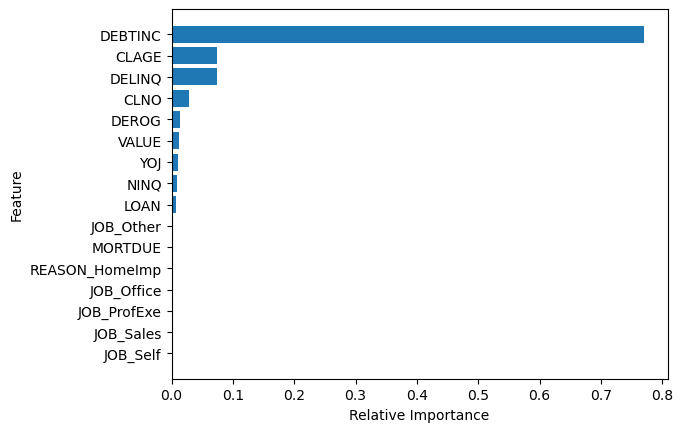

In [45]:
feature_importance = DT_feat_importance['Importance'].sort_values(ascending=False)

plt.barh(feature_importance.index, feature_importance)
plt.gca().invert_yaxis() #this inverts the y-axis so that the most important features are shown at the top
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

The debt-to-income ratio is by far considered the most important variable for predicting whether or not someone will default on their home equity loan according to the tuned decision tree model, which is interesting, as debt-to-income ratio wasn't the variable with the strongest correlation to the `BAD` variable, which is the variable that says whether or not a custoer defaulted on a loan.

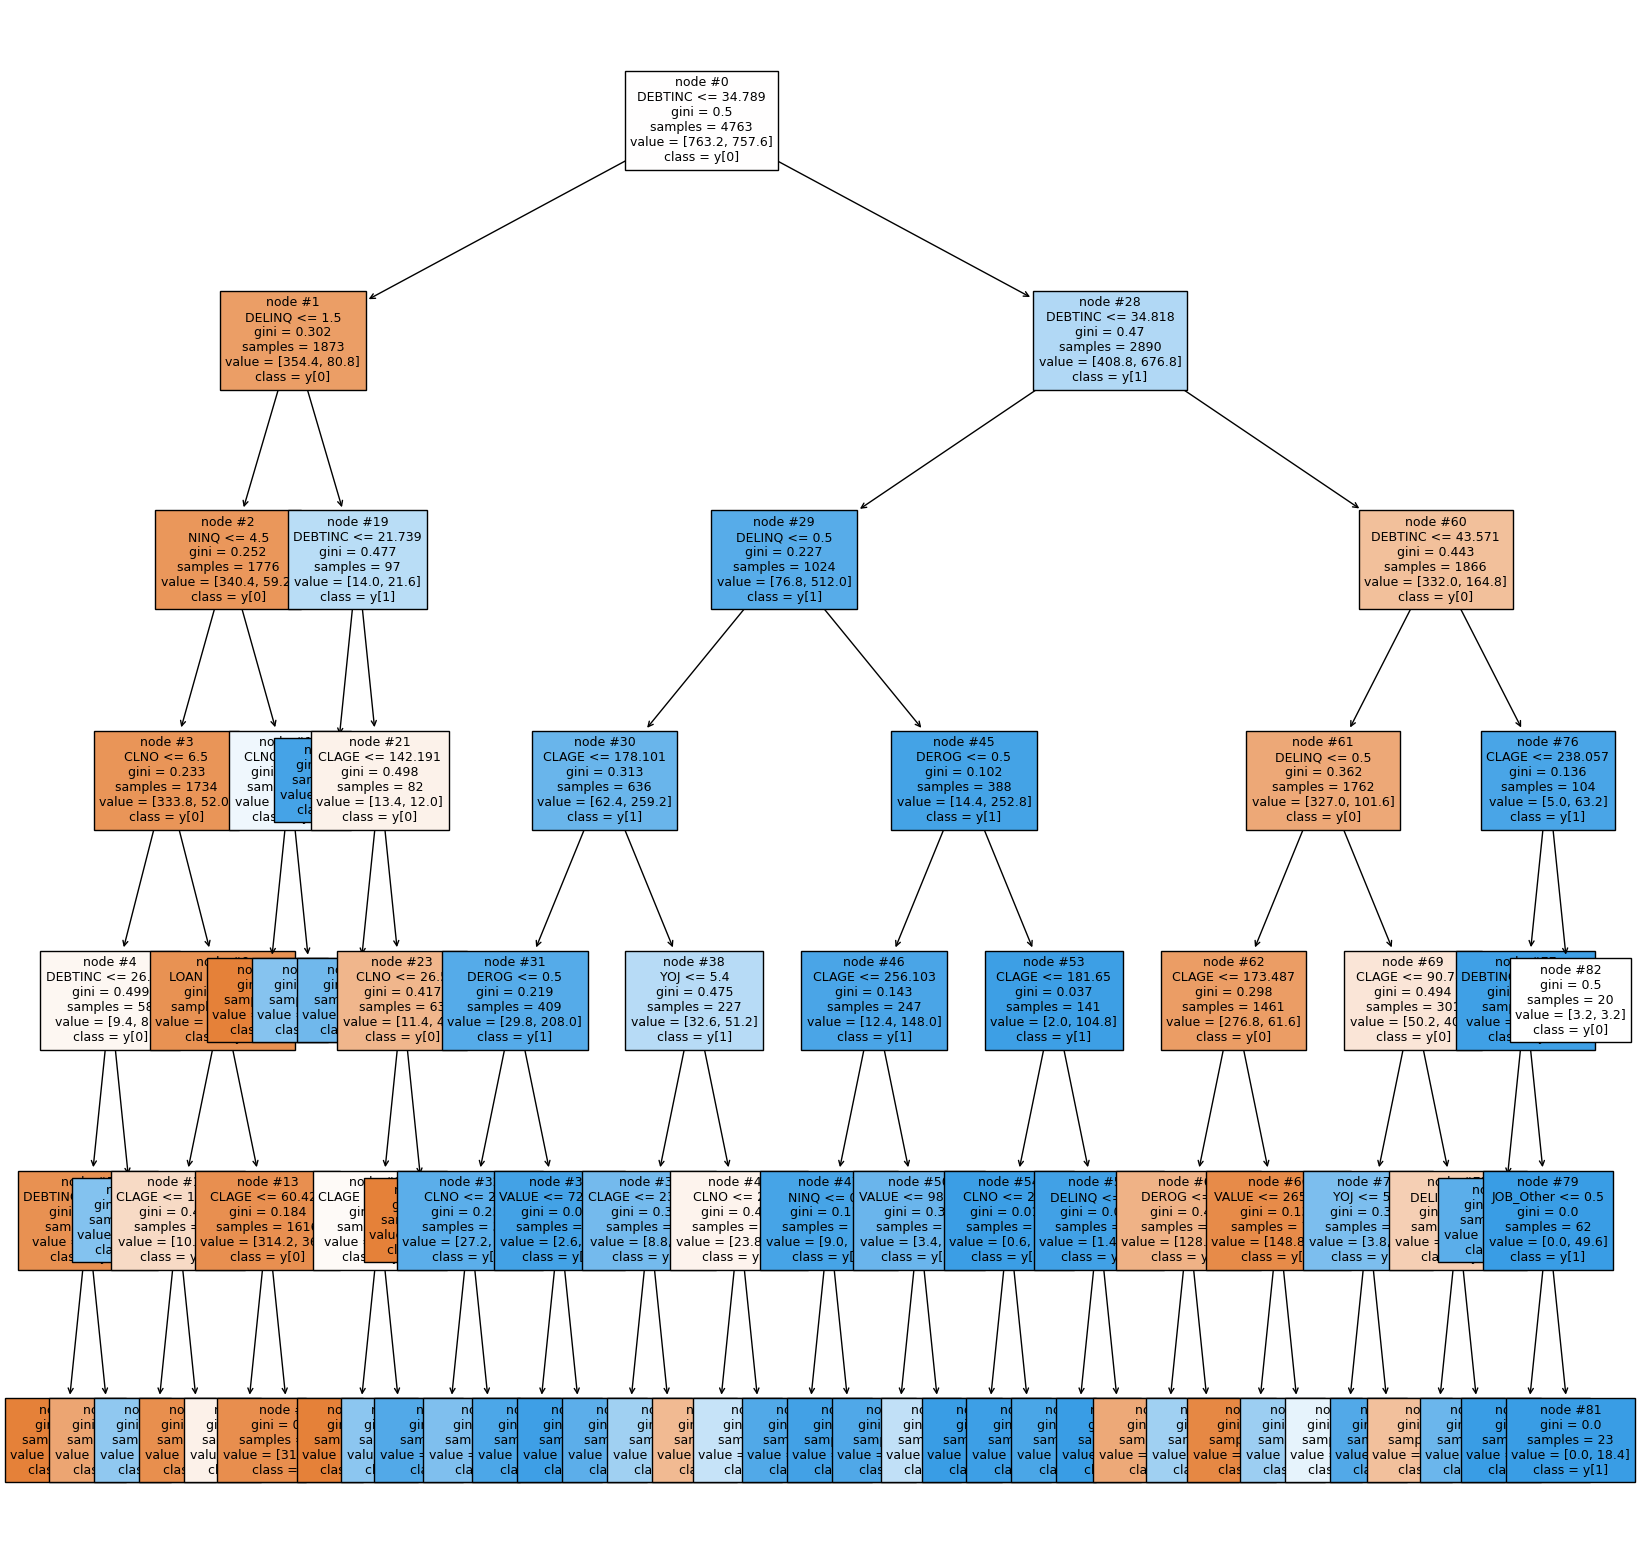

In [46]:
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_model_tune, feature_names = list(DT_x_train.columns), filled = True, fontsize = 9, node_ids = True, class_names = True)
#plt.savefig('Final Decision Tree1.png')
plt.show()

**1. Comparison of various techniques and their relative performance based on chosen metric:** 

The primary metric of success for a model in this scenario is recall, and this is because predicting who will default on their home equity loan is the more important goal, as predicting that someone isn't going to default on a loan but they do default on a loan has a negative impact on the bank's profit. Precision was chosen as a secondary measure of success, as although primarily the bank doesn't want to give out loans to people who are likely to default on them, the bank also doesn't want to lose too many customers with incorrect predictions of defaulting on a loan.

Both the untuned decision tree model and the random forest performed perfectly on the training and test data, however, it is likely that these models are overfitting the data. The best performing model is the tuned decision tree model. Overall, both decision trees and random forest perform better than logistic regression, particularly in correctly predicting which potential customers will default on their loans. 

There is scope to improve the performance of the models. The performance of the models could be improved through better tuning of the models. The logistic regression model could be improved by perhaps removing more data points that are potentially outliers. 

**2. Refined insights:** 

- Decision trees and random forests are better at predicting who is going to default on a home equity loan.
- The most important feature for predicting whether or not someone is going to default on a home equity loan is the debt-to-income ratio of the potential customer according to all of the decision tree and random forest models.
- The tuned random forest also places importance on delinquency as an importance feature for predicting whether or not someone is going to default on a home equity loan. 

**3. Proposal for the final solution design:** 

Overall, I would propose for the tuned decision tree model to be adopted because it performs the best, and a decision tree is easily interpretable, which is important because the bank needs to be able to give a reason for rejecting someone for a home equity loan if asked. Additionally, decision trees are quicker to run compared to random forests. Additionally, decision trees have the advantage of not being vulnerable to outliers when creating a model. 

## Executive summary

Overall, debt-to-income ratio is the most important factor for predicting whether or not someone is likely to default on a home equity loan, and the primary reason for taking out home equity loans is to consolidate debt. The age of their oldest credit line and the number of deliquent credit lines they have are the next most important factors in predicting whether or not someone is likely to default on a home equity loan. The proposed model for predicting whether or not someone will default on a home equity loan is a tuned decision tree classification model. This model does well in predicting whether or not someone will default on a home equity loan, and performs well on observed data, though the performance of the model is not yet good enough for the model to be put into production. The precision of the model is the main metric that needs to be improved before the model is ready for production. The model has some limitations, such as only determining whether or not a customer is predicted to default on a home equity loan but not the likelihood of that outcome happening; the model also currently has little customisation on what features are considered most important for the decision tree, which is a feature that banks may want. The final solution correctly predicts 76% of all loan defaults.

The next step is to improve the model so it is ready for production through gathering more data and better tuning of the model. The model could potentially be improved through feature selection. Stakeholders may wish to consider how much their organisation would want to customise the model; customisation of the model could be achieved through feature selection and giving more weight to some variables over others. 

## Problem and solution summary 

### Problem summary

Banks lose money when customers default on their loans, and the current loan approval process is prone to incorrect judgements due to human error or biases and it is time-consuming. Additionally, banking is a very important industry in a modern economy, and as seen with the 2008 crash, if banking fails, the entire economy is adversely affected. Considering that currently, ~20% of customers default on their home equity loans, it is very important that banks are able to successfully predict who is likely to default on their home equity loan.

The aim is to create a process to simplify the decision of whether or not to approve or reject customers for home equity loans, ensuring that the guidelines of the Equal Opportunity Credit Act are followed. This was done through building a tuned decision tree classification model.

### Final solution design

Three main classification models were tested, including logistic regression models and random forest models, both tuned and untuned. The final solution is a decision tree model with hyperparameter tuning. This model was chosen because it was the best performing in terms of predicting whether or not a given person will default on a home equity loan, and it is the model with the highest interpretability, which is important because the bank needs to be able to give reasoning useful if someone asks why they were rejected for a home equity loan. By simplifying the process of deciding who is approved or rejected for a home equity loan, employees are able to be more productive, enabling the profits of the bank to increase. The final solution correctly predicts 76% of loan defaults, and it is correct 58% of the time when predicting that someone will default on their loan. 

## Recommendations for implementation

**Stakeholder actions**

I would recommend for stakeholders to check model metrics quarterly, after major events (such as the Covid-19 pandemic) and just after the model has been implemented in order to check that the model is running how it should be, and to account for changes in circumstances. In order to gain the full benefits of automating whether or not someone should be approved for a home equity loan based on if they are predicted to default on said loan, I would recommend for stakeholders to utilise technology more greatly in their organisations if they don't do so already, e.g. by having an online system where customers can upload documents digitally so all of their documents are in one place for the bank to refer back to if necessary. I would recommend for this system to initially be implemented such that a human is still making the final decision as to whether or not the loan should be approved, particularly for more complex cases.

**Benefits and costs**

The benefits of this solution are: it is faster to run compared to other classification models, it's interpretable, it isn't vulnerable to outliers, and it requires little data cleaning. Additionally, decisions are less vulnerable to human biases and error. The bank can also have an increase in the number of customers, as an automated decision making process can approve someone for a home equity loan in minutes rather than hours. Once this is ready to go into production, the cost of it to the business would be \$500 per month. By implementing this solution, the same number of employees can handle 33\% more loans, based on figures from a similar product offered by a company called Blend [1].   

**Potential limitations**

There is a risk of making an incorrect decision, however. Also, there isn't a way of seeing the probability of someone defaulting on a loan, meaning that there will still need to have humans involved if the bank may want to lend to someone with a higher risk of defaulting but lend to that person at a higher interest rate. There is also a risk that the model may change drastically if even small changes are made in the training dataset for the model.

**Further analysis**

The primary piece of further analysis that would need to be carried out is improving the decision tree so that it is ready for production - this would mean the decision tree correctly predicting at least 80\% of all loan defaults, and that the decision tree is correct at least 75\% of the time when predicting that someone will default on their loan. Further analysis using more variables would need to be carried out, for example, the income a customer earns may be a predictor of whether or not they are likely to default on their home equity loan. Additionally, another piece of further analysis that should be carried out is customising the model with feature selection and giving more weight to some variables over others, for example, giving more weighting to factors such as the age of the customer's oldest credit line, but giving less weighting to the type of job they have, for example. A piece of further analysis that may be useful to carry out is building the model but without replacing the missing values in order to see what impact that would have on the model, as banks may not always have complete data from customers.

## References

1. Blend: evaluating the home equity experience
<br>URL: https://info.blend.com/rs/287-UGB-469/images/evaluating-the-home-equity-experience

# Appendix

### Logistic Regression

#### Training data

In [47]:
LR_model = LogisticRegression(random_state=1)  #I'm choosing a value for random_state for consistency 

LR_model.fit(LR_x_train, LR_y_train)

LogisticRegression(random_state=1)

LR_training_data


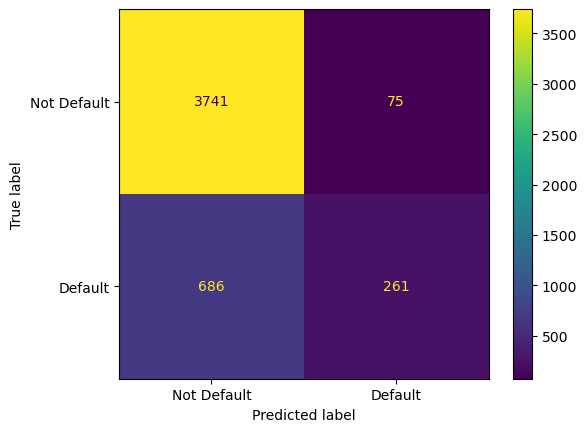

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3816
           1       0.78      0.28      0.41       947

    accuracy                           0.84      4763
   macro avg       0.81      0.63      0.66      4763
weighted avg       0.83      0.84      0.81      4763



In [48]:
LR_predict_train = LR_model.predict(LR_x_train)

model_metrics(LR_y_train, LR_predict_train)

The model isn't overfitting the data, and the model has reasonable precision. However, the recall score for defaulting is too low for this to be useful; it only correctly predicts 28% of the times that someone will default on their loan.

#### Test data

LR_test_data


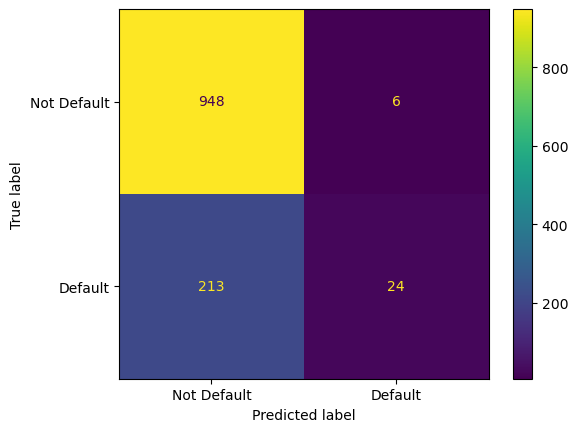

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       954
           1       0.80      0.10      0.18       237

    accuracy                           0.82      1191
   macro avg       0.81      0.55      0.54      1191
weighted avg       0.81      0.82      0.75      1191



In [49]:
LR_model.fit(LR_x_test, LR_y_test)

LR_predict_test = LR_model.predict(LR_x_test)

model_metrics(LR_y_test, LR_predict_test)

The precision score for defaulting is better in the test data compared to the training data, however, the recall score for defaulting is worse than the training dataset. Tuning the logistic regression model may improve these scores.

### Tuned logistic regression model

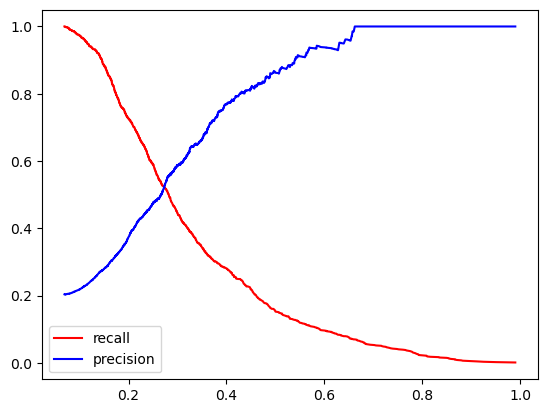

In [50]:
#Precision-recall curve

LR_y_score = LR_model.predict_proba(LR_x_train) #this predicts the likelihood of an observation belonging to either class 0 or 1

precision_LR, recall_LR, threshold_LR = precision_recall_curve(LR_y_train, LR_y_score[:, 1])

plt.plot(threshold_LR, recall_LR[:-1], 'r-', label='recall')
plt.plot(threshold_LR, precision_LR[:-1], 'b-', label='precision')
plt.legend()

plt.show()

The optimum threshold between precision and recall is approximately 0.3.

Tuned_LR_training_data


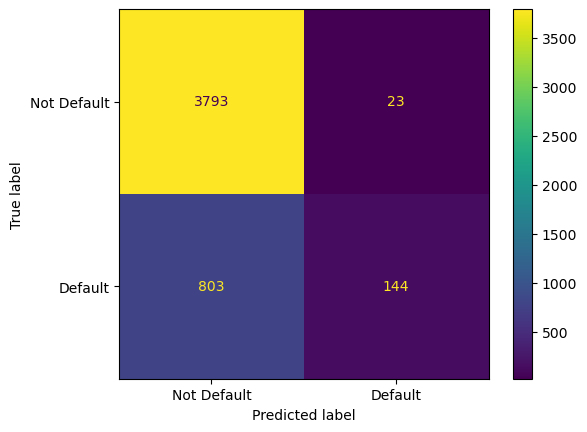

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3816
           1       0.86      0.15      0.26       947

    accuracy                           0.83      4763
   macro avg       0.84      0.57      0.58      4763
weighted avg       0.83      0.83      0.77      4763



In [51]:
opt_thresh = 0.3

LR_predict_train = LR_model.predict(LR_x_train)

model_metrics(LR_y_train, LR_predict_train > opt_thresh)

Tuned_LR_test_data


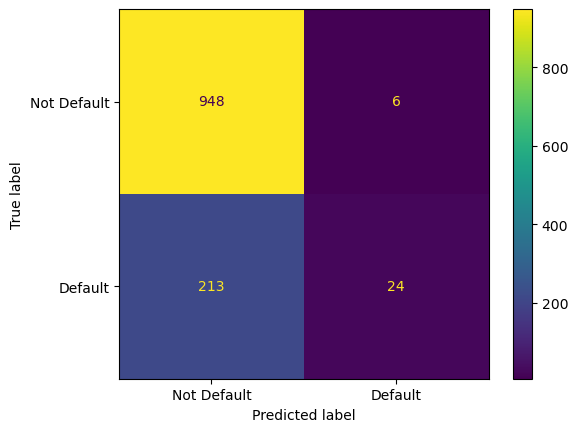

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       954
           1       0.80      0.10      0.18       237

    accuracy                           0.82      1191
   macro avg       0.81      0.55      0.54      1191
weighted avg       0.81      0.82      0.75      1191



In [52]:
LR_predict_test = LR_model.predict(LR_x_test)

model_metrics(LR_y_test, LR_predict_test > opt_thresh)

Tuning the logistic regression using the optimal threshold has not made a positive impact on the recall of status 1; this model may not be performing well due to potential outliers still in the data. 

Tuned_train_data1


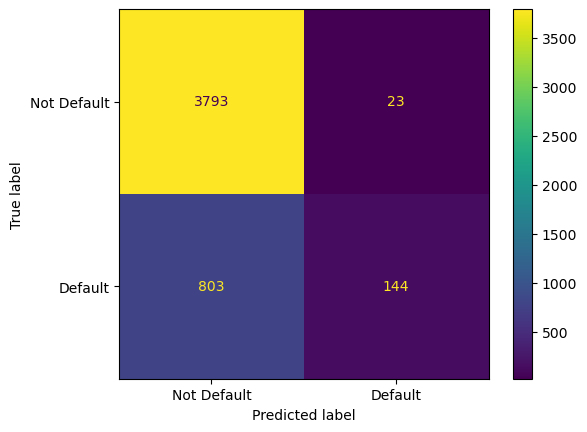

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3816
           1       0.86      0.15      0.26       947

    accuracy                           0.83      4763
   macro avg       0.84      0.57      0.58      4763
weighted avg       0.83      0.83      0.77      4763

Tuned_test_data2


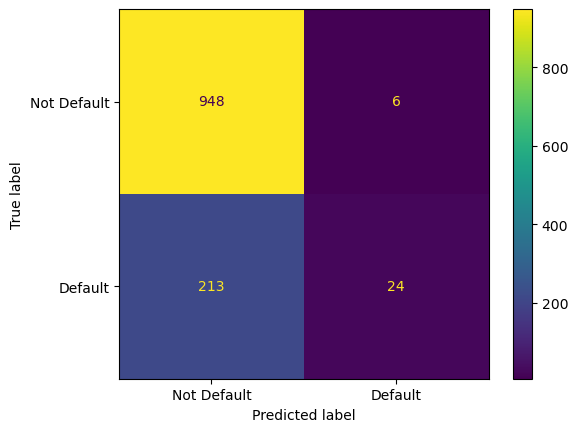

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       954
           1       0.80      0.10      0.18       237

    accuracy                           0.82      1191
   macro avg       0.81      0.55      0.54      1191
weighted avg       0.81      0.82      0.75      1191



In [53]:
opt_thresh1 = 0.35

model_metrics(LR_y_train, LR_predict_train > opt_thresh1)
model_metrics(LR_y_test, LR_predict_test > opt_thresh)

### Decision Tree

#### Training data

In [54]:
d_tree_model = DecisionTreeClassifier(random_state=1) #I'm choosing a value for random_state for consistency 

d_tree_model.fit(DT_x_train, DT_y_train)

DecisionTreeClassifier(random_state=1)

DT_train_data


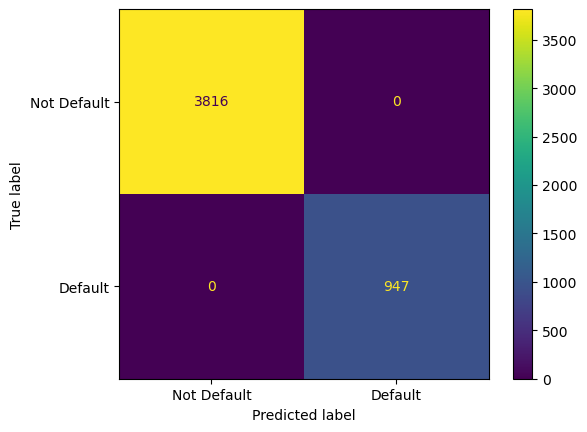

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3816
           1       1.00      1.00      1.00       947

    accuracy                           1.00      4763
   macro avg       1.00      1.00      1.00      4763
weighted avg       1.00      1.00      1.00      4763



In [55]:
DT_predict_train = d_tree_model.predict(DT_x_train)

model_metrics(DT_y_train, DT_predict_train)

#### Test data

In [56]:
d_tree_model.fit(DT_x_test, DT_y_test)

DecisionTreeClassifier(random_state=1)

DT_test_data


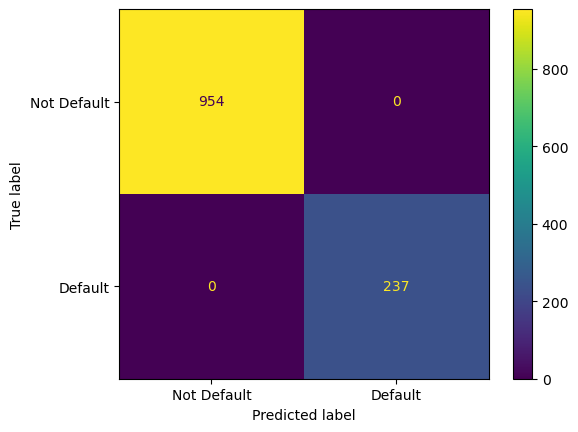

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       237

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



In [57]:
DT_predict_test = d_tree_model.predict(DT_x_test)

model_metrics(DT_y_test, DT_predict_test)

This model fits the data perfectly, which suggests that this model is likely not generalisable and is overfitting the training data and the test data.

In [58]:
DT_feat_imp = pd.DataFrame(d_tree_model.feature_importances_, columns= ['Importance'], index=DT_x_train.columns)

print(DT_feat_imp.sort_values(by='Importance', ascending=False))

                Importance
DEBTINC           0.278435
LOAN              0.114993
DELINQ            0.114232
CLAGE             0.109165
MORTDUE           0.096745
YOJ               0.083801
CLNO              0.067002
VALUE             0.065788
NINQ              0.024792
JOB_ProfExe       0.016154
DEROG             0.014492
REASON_HomeImp    0.004390
JOB_Office        0.003746
JOB_Sales         0.002615
JOB_Other         0.002106
JOB_Self          0.001545


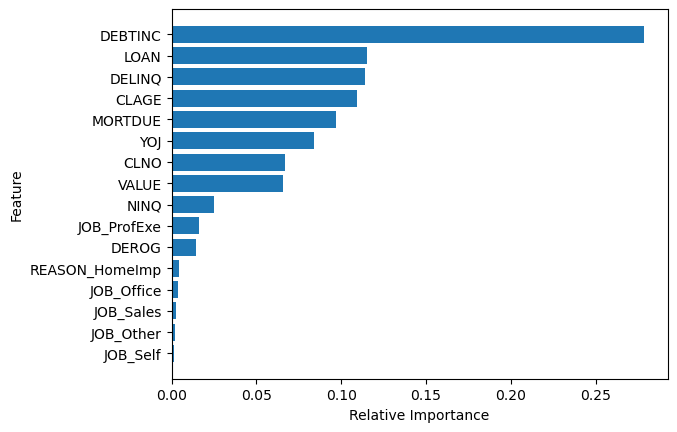

In [59]:
feature_importance = DT_feat_imp['Importance'].sort_values(ascending=False)

plt.barh(feature_importance.index, feature_importance)
plt.gca().invert_yaxis() #this inverts the y-axis so that the most important features are shown at the top
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

The three most important features for predicting that someone will default on their loans according to the untuned decision tree are: debt-to-income ratio, the loan amount, and the age of the oldest credit line.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

#### Training data

In [60]:
RF_model = RandomForestClassifier(random_state=1) #this is a random forest classifier

RF_model.fit(DT_x_train, DT_y_train)

RandomForestClassifier(random_state=1)

In [61]:
RF_predict_train = RF_model.predict(DT_x_train)

RF_train_data


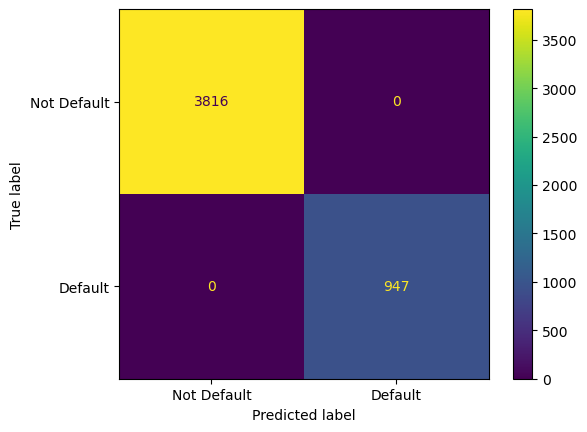

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3816
           1       1.00      1.00      1.00       947

    accuracy                           1.00      4763
   macro avg       1.00      1.00      1.00      4763
weighted avg       1.00      1.00      1.00      4763



In [62]:
model_metrics(DT_y_train, RF_predict_train)

#### Test data

In [63]:
RF_model.fit(DT_x_test, DT_y_test)

RandomForestClassifier(random_state=1)

In [64]:
RF_predict_test = RF_model.predict(DT_x_test)

RF_test_data


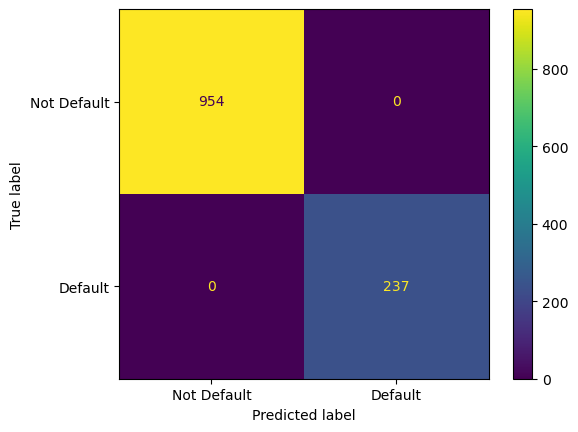

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       237

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



In [65]:
model_metrics(DT_y_test, RF_predict_test)

The model fits both the training and test data perfectly; it is potentially overfitting the data.

In [66]:
RF_feat_imp = pd.DataFrame(RF_model.feature_importances_, columns= ['Importance'], index=DT_x_train.columns)

print(RF_feat_imp.sort_values(by='Importance', ascending=False))

                Importance
DEBTINC           0.204762
LOAN              0.113165
CLAGE             0.111956
DELINQ            0.097610
MORTDUE           0.093389
VALUE             0.090801
CLNO              0.084948
YOJ               0.067270
NINQ              0.045603
DEROG             0.038746
JOB_Other         0.013044
REASON_HomeImp    0.011973
JOB_ProfExe       0.009489
JOB_Office        0.008821
JOB_Sales         0.004892
JOB_Self          0.003532


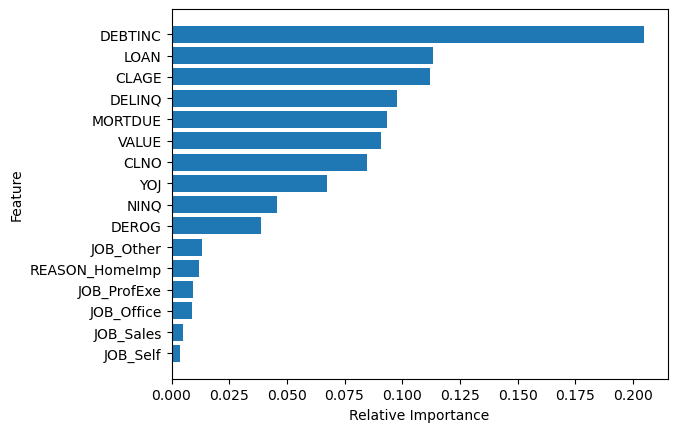

In [67]:
feature_importance = RF_feat_imp['Importance'].sort_values(ascending=False)

plt.barh(feature_importance.index, feature_importance)
plt.gca().invert_yaxis() #this inverts the y-axis so that the most important features are shown at the top
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

The three most important features for predicting that someone will default on their loans according to the untuned random forest model are: debt-to-income ratio, the loan amount, and the age of the oldest credit line. This matches with the feature selection done by the untuned decision tree.

### **Random Forest Classifier Hyperparameter Tuning**

In [68]:
#Tuning the random forest model

RF_model_tune = RandomForestClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8}) #these class weights are approximately the opposite to the imbalance in the original data

params = {'max_depth': np.arange(3, 9), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 25]}

score = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_object = GridSearchCV(RF_model_tune, params, scoring = score, cv = 5)

grid_object = grid_object.fit(DT_x_train, DT_y_train)

# Setting the classifier to the best combination of parameters
RF_model_tune = grid_object.best_estimator_

RF_model_tune.fit(DT_x_train, DT_y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       min_samples_leaf=20, random_state=1)

Tuned_RF_train_data


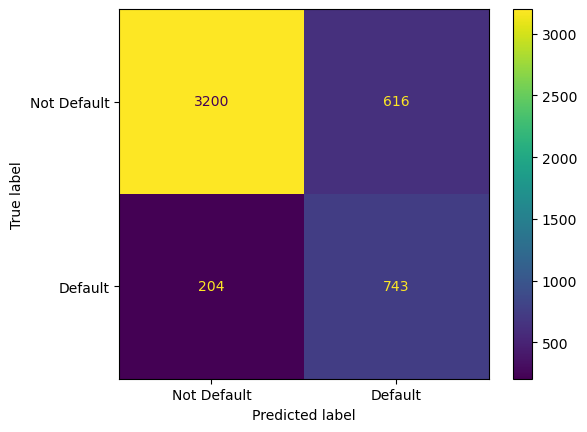

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3816
           1       0.55      0.78      0.64       947

    accuracy                           0.83      4763
   macro avg       0.74      0.81      0.77      4763
weighted avg       0.86      0.83      0.84      4763



In [69]:
RF_predict_train2 = RF_model_tune.predict(DT_x_train)

model_metrics(DT_y_train, RF_predict_train2)

The model appears to not be overfiiting the training data, which suggests tha the model is generalisable. The model correctly predicts someone defaulting on their home equity loan 78% of the time.

Tuned_RF_test_data


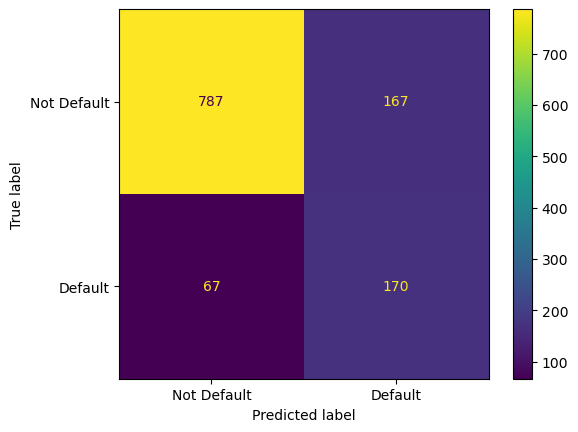

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       954
           1       0.50      0.72      0.59       237

    accuracy                           0.80      1191
   macro avg       0.71      0.77      0.73      1191
weighted avg       0.84      0.80      0.82      1191



In [70]:
RF_predict_test2 = RF_model_tune.predict(DT_x_test)

model_metrics(DT_y_test, RF_predict_test2)

This model is generalisable, and correctly predicts that a given person will default on their home equity loan 72% of the time.

In [71]:
RF_feat_importance = pd.DataFrame(RF_model_tune.feature_importances_, columns= ['Importance'], index=DT_x_train.columns)

print(RF_feat_importance.sort_values(by='Importance', ascending=False))

                Importance
DEBTINC           0.415771
DELINQ            0.215455
DEROG             0.148308
CLAGE             0.096692
LOAN              0.029167
NINQ              0.027819
VALUE             0.017672
CLNO              0.015561
MORTDUE           0.011623
YOJ               0.010785
JOB_Office        0.007688
JOB_Sales         0.002029
JOB_Other         0.000829
REASON_HomeImp    0.000429
JOB_Self          0.000090
JOB_ProfExe       0.000082


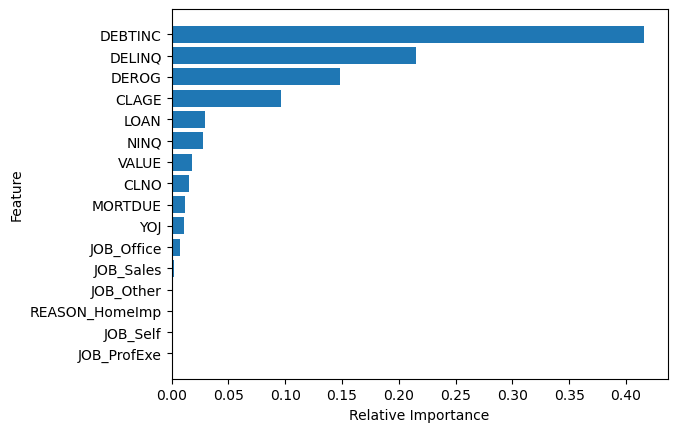

In [72]:
feature_importance = RF_feat_importance['Importance'].sort_values(ascending=False)

plt.barh(feature_importance.index, feature_importance)
plt.gca().invert_yaxis() #this inverts the y-axis so that the most important features are shown at the top
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

According to the tuned random forest model, the 3 most important features for predicting that someone will default on their home equity loan are: debt-to-income ratio, number of delinquencies, and number of derogatory reports. 